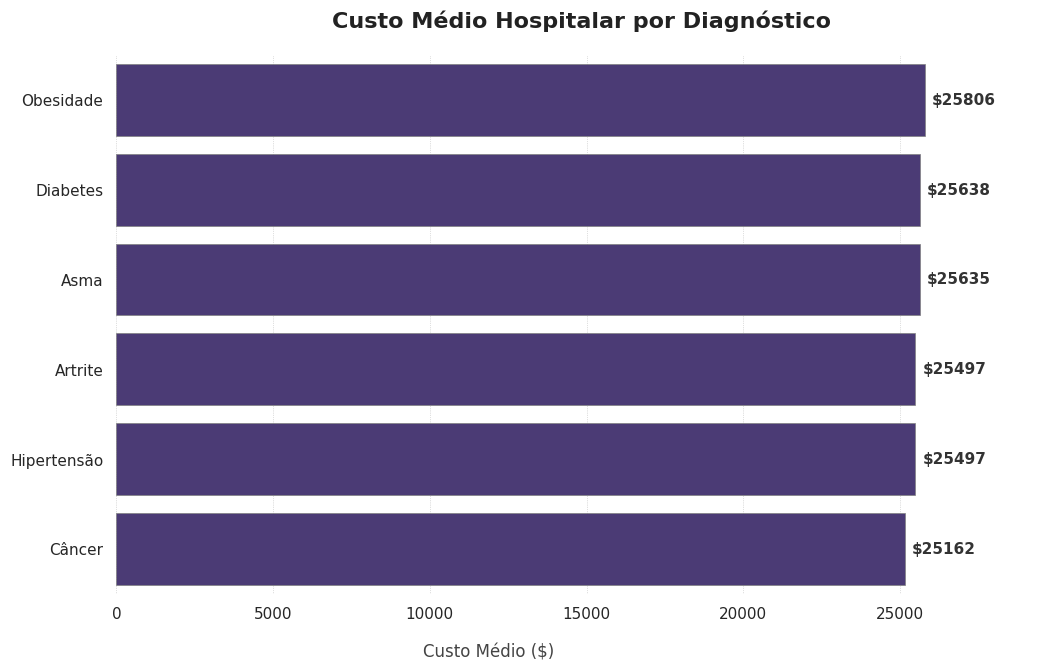

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuração Visual
sns.set_theme(style="whitegrid", palette="viridis")

# 2. Carregar Dados
try:
    df = pd.read_csv('healthcare_dataset.csv')
except FileNotFoundError:
    print("Erro: O arquivo não foi encontrado.")

# 3. Tradução
traducao = {
    'Cancer': 'Câncer', 'Obesity': 'Obesidade', 'Diabetes': 'Diabetes',
    'Asthma': 'Asma', 'Hypertension': 'Hipertensão', 'Arthritis': 'Artrite'
}
df['Medical Condition'] = df['Medical Condition'].replace(traducao)

# 4. Agrupamento
custo_por_doenca = df.groupby('Medical Condition')['Billing Amount'].mean().sort_values(ascending=False).reset_index()

# 5. Criando o Gráfico
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=custo_por_doenca,
    x='Billing Amount',
    y='Medical Condition',
    edgecolor='gray',
    linewidth=0.5
)

# 6. Números nas Barras
for container in ax.containers:
    ax.bar_label(container, fmt='$%.0f', padding=5, color='#333333', fontsize=11, fontweight='bold')

# 7. Títulos e Eixos (AQUI ESTÁ A MUDANÇA)
plt.title('Custo Médio Hospitalar por Diagnóstico', fontsize=16, color='#222222', fontweight='bold', pad=20)

# labelpad=15 (distância para baixo)
# x=0.4 (empurra um pouco para a esquerda - teste valores como 0.3 ou 0.45)
plt.xlabel('Custo Médio ($)', fontsize=12, color='#444444', labelpad=15, x=0.4)
plt.ylabel('', fontsize=12) 

# Ajustes finais
plt.grid(axis='y', alpha=0) 
plt.grid(axis='x', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
sns.despine(left=True, bottom=True)
plt.xlim(right=custo_por_doenca['Billing Amount'].max() * 1.15) 

plt.show()